<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#First-Insights-into-Insurance-Dataset" data-toc-modified-id="First-Insights-into-Insurance-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>First Insights into Insurance Dataset</a></span></li><li><span><a href="#Inspect-Charges-vs-Other-Features" data-toc-modified-id="Inspect-Charges-vs-Other-Features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inspect Charges vs Other Features</a></span></li><li><span><a href="#Conversion-of-Categorical-Variables-into-Numerical-Variables-and-Correlation-Matrix" data-toc-modified-id="Conversion-of-Categorical-Variables-into-Numerical-Variables-and-Correlation-Matrix-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conversion of Categorical Variables into Numerical Variables and Correlation Matrix</a></span></li><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Correlation Matrix</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## First Insights into Insurance Dataset

In [2]:
df = pd.read_csv('datafiles/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# look up the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


`insurance` is a DataFrame object with 1338 rows and 7 columns. There is no missing value present in our data.Here are the coloumns;
- age: age of primary user.
- sex: gender.
- bmi: Body Mass Index, ideally between 18.5 and 24.9
- children: number of children/dependents
- smoker: smoking or not
- region: the beneficiary's residential area in the US.
- charges: total premium billed by health insurance

We will use `charges` as our target variable and the rest as the predictors. Notice that some predictors are numerical(int64, float64) such as age,bmi,children and some are categorical(object) sex,smoker and region. **Categorical variables MUST be converted to numerical varibles before the model training stage**

In [4]:
#Notice that this works only on numerical variables. Watch out for weird values
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [5]:
#let's reorder columns as follows. Put numerical guys first
col_names = ['charges','age', 'bmi','children','sex', 'smoker', 'region']
df = df.reindex(columns = col_names)
df.head()

,charges,age,bmi,children,sex,smoker,region
0,16884.92400,19,27.900,0,female,yes,southwest
1,1725.55230,18,33.770,1,male,no,southeast
2,4449.46200,28,33.000,3,male,no,southeast
3,21984.47061,33,22.705,0,male,no,northwest
4,3866.85520,32,28.880,0,male,no,northwest


## Inspect Charges vs Other Features

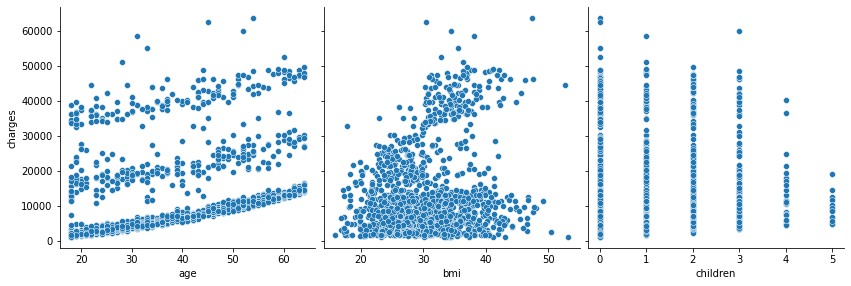

In [6]:
sns.pairplot(df, x_vars = ['age','bmi','children'], y_vars='charges',
             height = 4, aspect = 1, kind = 'scatter')


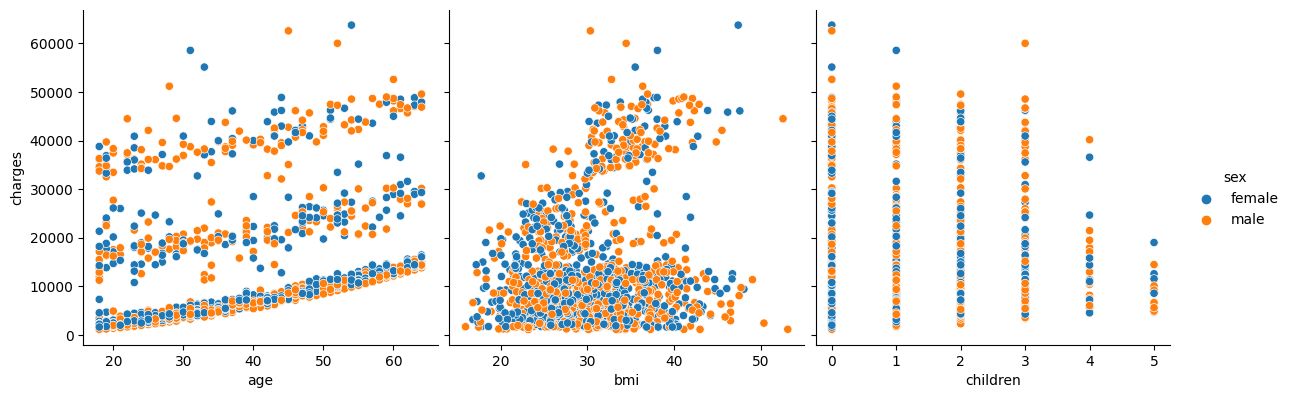

In [7]:
sns.pairplot(df, x_vars = ['age','bmi','children'], y_vars='charges',hue='sex',
             height = 4, aspect = 1, kind = 'scatter')


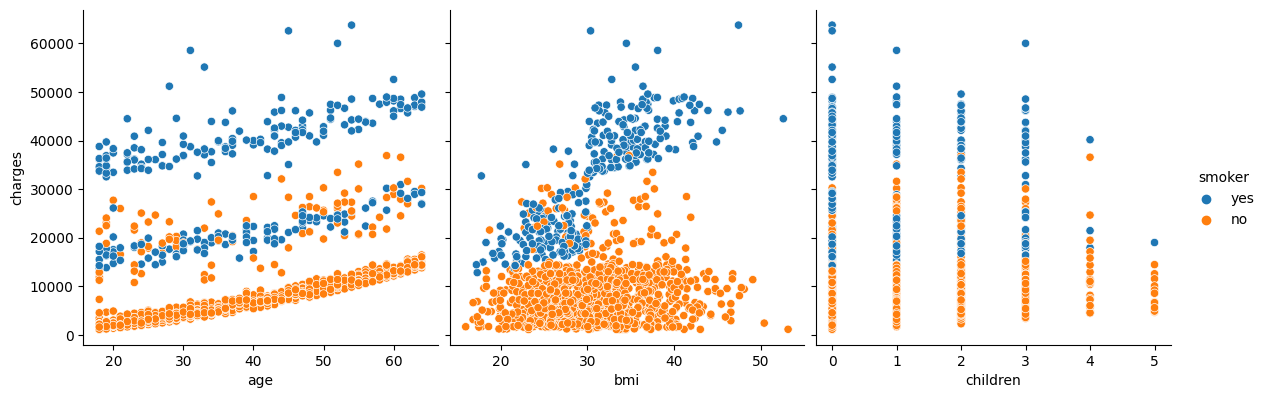

In [8]:
sns.pairplot(df, x_vars = ['age','bmi','children'], y_vars='charges',hue='smoker',
             height = 4, aspect = 1, kind = 'scatter')


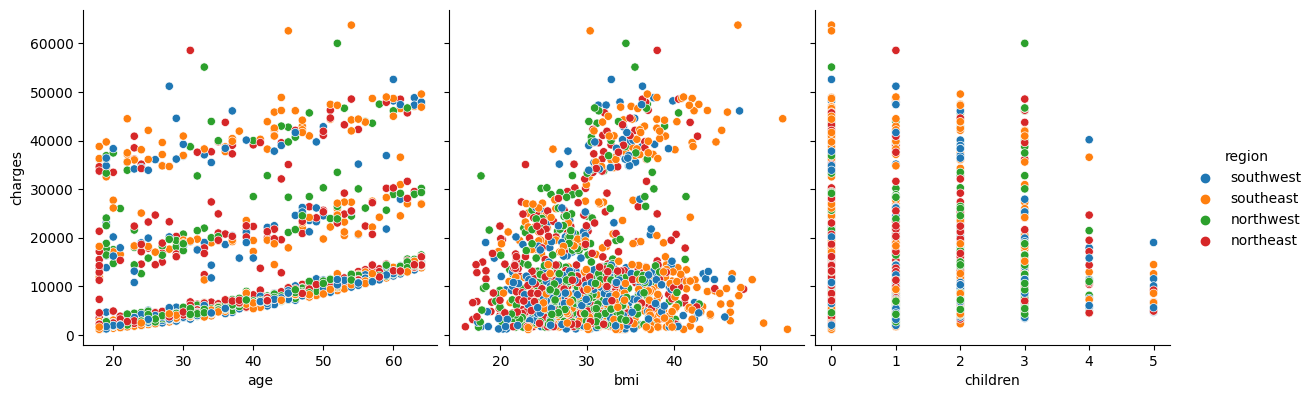

In [9]:
sns.pairplot(df, x_vars = ['age','bmi','children'], y_vars='charges',hue='region',
             height = 4, aspect = 1, kind = 'scatter')


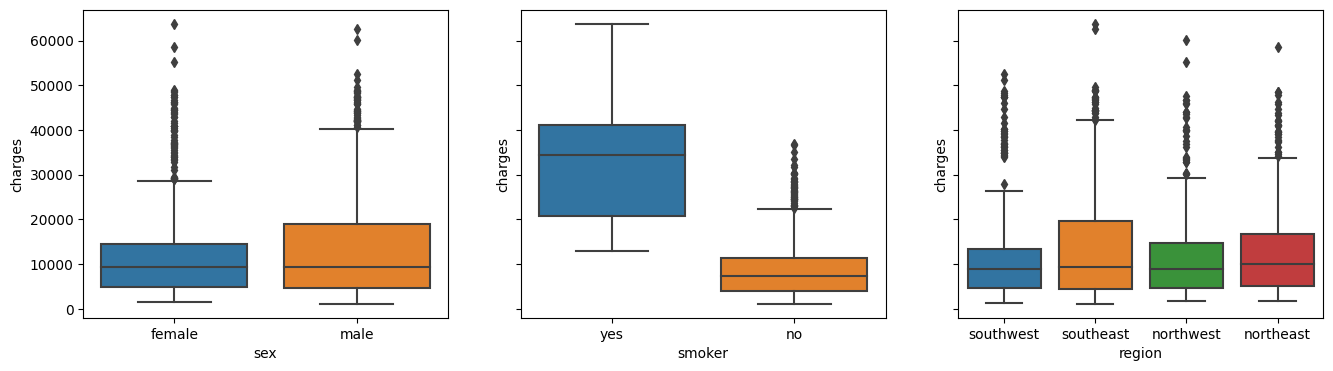

In [10]:
fig,ax = plt.subplots(1,3,figsize=(16,4),sharey=True)

sns.boxplot(data=df, x='sex',y='charges',ax=ax[0])

sns.boxplot(data=df, x='smoker',y='charges',ax=ax[1])

sns.boxplot(data=df,x='region',y='charges',ax=ax[2])

plt.show()

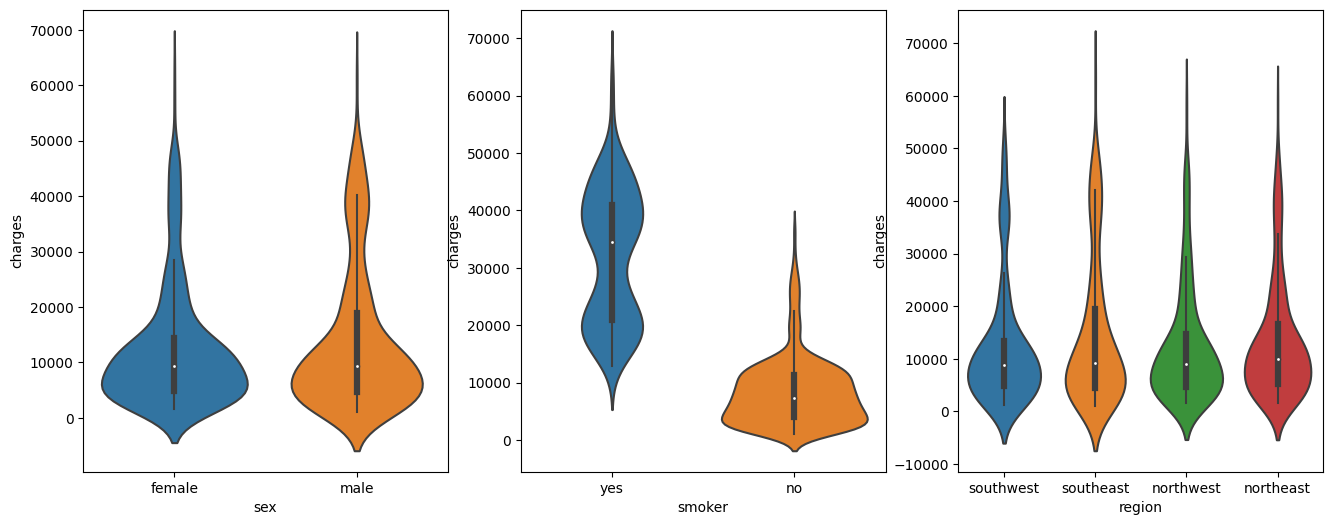

In [11]:
fig,ax = plt.subplots(1,3,figsize=(16,6))

sns.violinplot(data=df, x='sex',y='charges',ax=ax[0])

sns.violinplot(data=df, x='smoker',y='charges',ax=ax[1])

sns.violinplot(data=df,x='region',y='charges',ax=ax[2])

plt.show()

## Conversion of Categorical Variables into Numerical Variables and Correlation Matrix

In [12]:
#think about drop_first = True
df_enc = pd.get_dummies(df, columns = ['sex','smoker','region'])
df_enc

,charges,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,16884.92400,19,27.900,0,1,0,0,1,0,0,0,1
1,1725.55230,18,33.770,1,0,1,1,0,0,0,1,0
2,4449.46200,28,33.000,3,0,1,1,0,0,0,1,0
3,21984.47061,33,22.705,0,0,1,1,0,0,1,0,0
4,3866.85520,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,10600.54830,50,30.970,3,0,1,1,0,0,1,0,0
1334,2205.98080,18,31.920,0,1,0,1,0,1,0,0,0
1335,1629.83350,18,36.850,0,1,0,1,0,0,0,1,0
1336,2007.94500,21,25.800,0,1,0,1,0,0,0,0,1


- Consider a simple example. Wealth level: Good, Medium, Poor vs Number of Children. Use dummies by dropping Poor

The model looks like $$Y = w_0+w_1X_1+w_2X_2$$
So $X_3$ is not here? Actually if $X_1=0,X_2=0$ (means this person is poor) $\hat{Y} = w_0$ which is the expected number of children if the family is poor. So the information about the dropped person is embedded in the constant term. 
- This is one option, another option is to include all dummies but drop the intercept term. So the rule of thumb is *either drop the intercept term in the model and include a dummy for each category, or keep the intercept and exclude the dummy for any one category.* We will do the first one.

## Correlation Matrix

Correlation is a statistical measure on how strong a linear relationship between two variables. The values ranged between -1.0 and 1.0, where:
- Positive value = positive correlation, means one variable increases as the other variable increases, or vice versa. The closer to 1, the stronger the positive relationship.
- Negative value = negative correlation, means one variable decreases as the other variable increases, or vice versa. The closer to -1, the stronger the negative relationship.
- Zero = no correlation, means that a variable has nothing to do with the other variable.


We will use two methods to inspect the correlation. First one is to scatter plot each variable vs target variable. Another one is to display the Correlation Coefficient which which measures the linear relationship between two quantitative variables.

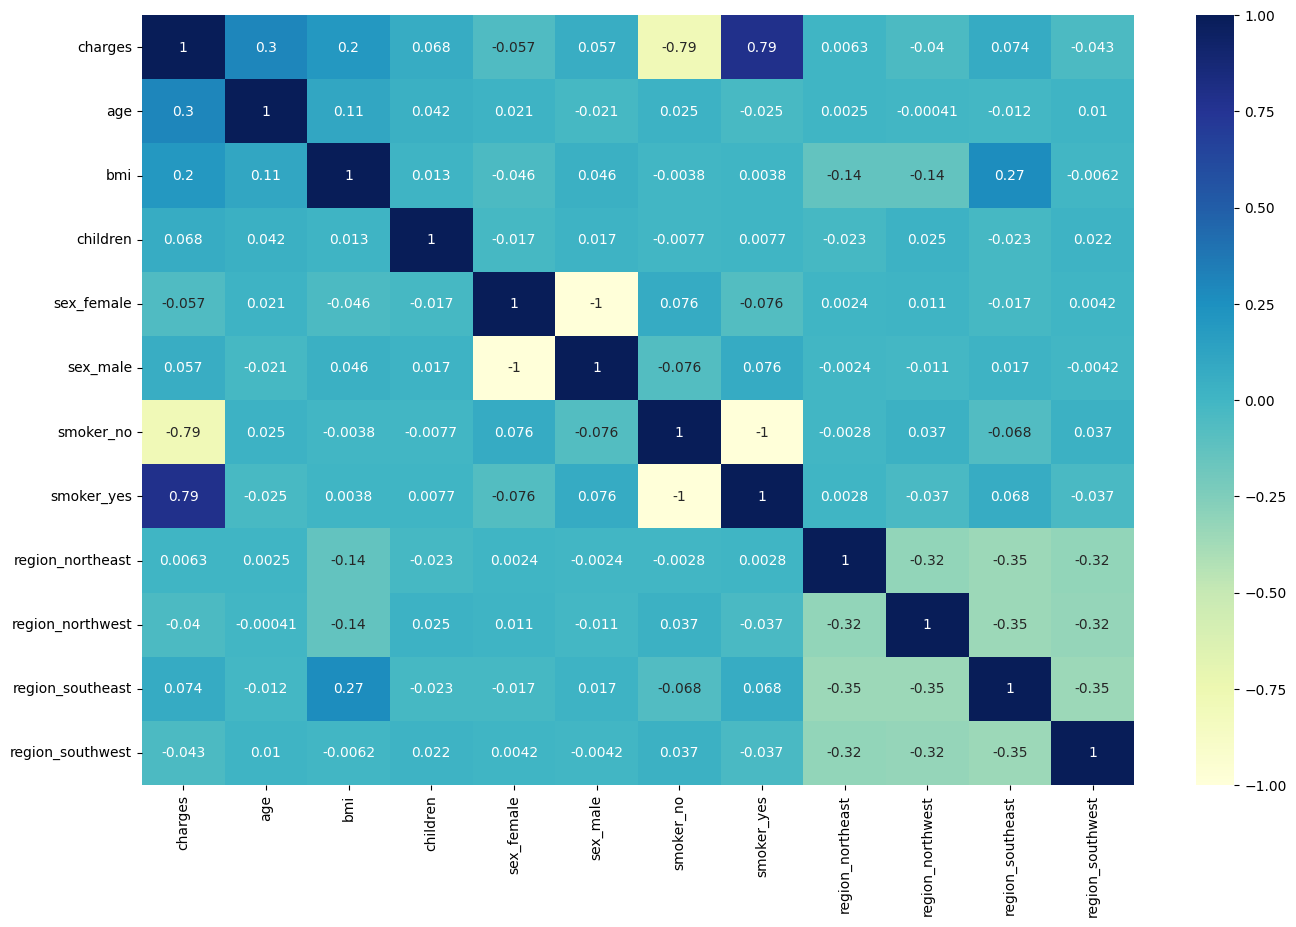

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df_enc.corr(), cmap = "YlGnBu", annot = True)
plt.show()

- We will look at the charges row(coloumn).Notice the correlation between smoking and charges. If you smoke, charges go up and vise versa. Age and bmi factors appear to have some effect on charges as well. 


- Similarly bmi and age appear to have mild effect on insurance charges. 


- All other variables seem to have insignificant effect on the amount of insurance charge.


- Also southeast region appears to have bigger body mass index(:. Is that really true? Look up online?